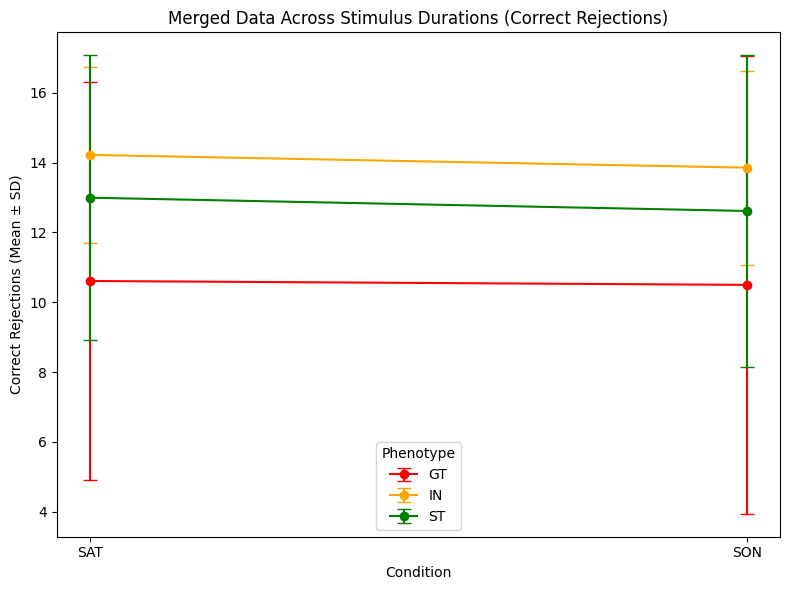

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file and the 'tidy' sheet
file_path = 'SATson1.xlsx'  # Replace with your file path if needed
tidy_df = pd.read_excel(file_path, sheet_name='tidy')

# Define the colors for the phenotypes
colors = {'ST': 'green', 'IN': 'orange', 'GT': 'red'}

# Grouping the data to calculate mean and standard deviation for 'cr'
cr_summary_df = tidy_df.groupby(['phenotype', 'stimulus_duration', 'condition']).agg(
    cr_mean=('cr', 'mean'),
    cr_sd=('cr', 'std')
).reset_index()

# Now, let's compute the mean across stimulus durations for 'cr' for each phenotype and condition
merged_cr_summary_df = cr_summary_df.groupby(['phenotype', 'condition']).agg(
    cr_mean=('cr_mean', 'mean'),
    cr_sd=('cr_sd', 'mean')  # Merging SD by averaging as well
).reset_index()

# Creating a new plot for the merged stimulus durations for 'cr'
fig, ax = plt.subplots(figsize=(8, 6))

for phenotype in merged_cr_summary_df['phenotype'].unique():
    # Filter data by phenotype
    phenotype_data = merged_cr_summary_df[merged_cr_summary_df['phenotype'] == phenotype]
    
    # Plot the mean line with error bars for SD
    ax.errorbar(phenotype_data['condition'], 
                phenotype_data['cr_mean'], 
                yerr=phenotype_data['cr_sd'], 
                label=phenotype, 
                color=colors[phenotype], 
                capsize=5, 
                marker='o')

ax.set_title('Merged Data Across Stimulus Durations (Correct Rejections)')
ax.set_xlabel('Condition')
ax.set_ylabel('Correct Rejections (Mean ± SD)')
ax.legend(title="Phenotype")

plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import pingouin as pg

# Load your dataset
file_path = 'SATson1.xlsx'  # Replace with your actual file path
tidy_df = pd.read_excel(file_path, sheet_name='tidy')

# Print column names to verify
print("Columns in the dataset:\n", tidy_df.columns)

# Ensure we are filtering the right columns for 'cr' (Correct Rejections)
if 'cr' in tidy_df.columns:
    # Filtering necessary columns for analysis (focus on phenotype, condition, and cr)
    cr_df = tidy_df[['phenotype', 'animal_id', 'condition', 'cr']]

    # Running the mixed-design ANOVA
    anova_results = pg.mixed_anova(
        dv='cr', 
        within='condition', 
        between='phenotype', 
        subject='animal_id', 
        data=cr_df
    )

    # Print ANOVA results
    print("ANOVA Results:\n", anova_results)

    # Check for significant factors and run Bonferroni post-hoc tests if needed
    significant_factors = anova_results[anova_results['p-unc'] < 0.05]['Source'].tolist()

    if significant_factors:
        post_hocs = pg.pairwise_ttests(
            dv='cr', 
            within='condition', 
            between='phenotype', 
            subject='animal_id', 
            data=cr_df, 
            padjust='bonferroni'
        )
        print("\nPost-hoc Results (Bonferroni corrected):\n", post_hocs)
    else:
        print("\nNo significant factors found.")
else:
    print("'cr' column not found in the dataset.")


Columns in the dataset:
 Index(['phenotype', 'animal_id', 'stimulus_duration', 'condition', 'hits',
       'misses', 'fa', 'cr', 'om'],
      dtype='object')
ANOVA Results:
         Source         SS  DF1  DF2         MS         F     p-unc       np2  \
0    phenotype  44.594163    2   19  22.297081  0.871271  0.434481  0.084008   
1    condition   0.487124    1   19   0.487124  0.884115  0.358879  0.044463   
2  Interaction   0.026879    2   19   0.013439  0.024392  0.975933  0.002561   

   eps  
0  NaN  
1  1.0  
2  NaN  

No significant factors found.
